In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Importing the dataset
dt = pd.read_excel('LUAD_clinical.xlsx',index_col=0)


In [3]:
dt.shape

(517, 347)

In [4]:
dt.head()

,Diagnosis Age,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Fraction Genome Altered,Year Cancer Initial Diagnosis,Longest Dimension,Number of Samples Per Patient,Sample type id,Shortest Dimension,Specimen Second Longest Dimension,...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)2
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,70.0,-25752.0,0,0.456523,2009.0,1.1,1,1,0.3,0.9,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,67.0,-24532.0,0,0.222128,2007.0,1.4,1,1,0.4,0.8,...,0,0,0,1,0,1,0,1,0,50.03
TCGA-05-4250-01,79.0,-29068.0,0,0.236200,2007.0,1.2,1,1,0.3,0.7,...,0,0,0,1,0,1,0,0,1,3.98
TCGA-05-4382-01,68.0,-24868.0,0,0.085449,2009.0,0.9,1,1,0.3,0.8,...,0,0,0,1,0,1,0,1,0,19.94
TCGA-05-4384-01,66.0,-24411.0,0,0.066063,2009.0,0.8,1,1,0.4,0.8,...,0,0,0,1,0,1,0,1,0,13.99


In [5]:
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']

In [6]:
X = dt.iloc[:,0:343]
y = dt.iloc[:, -1].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [9]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [10]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

In [11]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('Diagnosis Age', 0.02235736545224382)
('Birth from Initial Pathologic Diagnosis Date', 0.037635634240894784)
('Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value', 0.0)
('Fraction Genome Altered', 0.041581844109470245)
('Year Cancer Initial Diagnosis', 0.2511867015695122)
('Longest Dimension', 0.022407147450215322)
('Number of Samples Per Patient', 0.0005916368201948746)
('Sample type id', 0.0)
('Shortest Dimension', 0.021106813497217068)
('Specimen Second Longest Dimension', 0.024614679018772283)
('Patient Smoking History Category', 0.015630108769104464)
('American Joint Committee on Cancer Metastasis Stage Code_M0', 0.0016017216681806432)
('American Joint Committee on Cancer Metastasis Stage Code_M1', 0.0002842282685667896)
('American Joint Committee on Cancer Metastasis Stage Code_M1a', 0.0)
('American Joint Committee on Cancer Metastasis Stage Code_M1b', 9.450908549452678e-06)
('American Joint Committee on Cancer Metastasis Stage Code_MX', 0.003056756436771527)

In [13]:
#Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [14]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [15]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

Diagnosis Age
Birth from Initial Pathologic Diagnosis Date
Fraction Genome Altered
Year Cancer Initial Diagnosis
Longest Dimension
Shortest Dimension
Specimen Second Longest Dimension
Patient Smoking History Category
American Joint Committee on Cancer Metastasis Stage Code_MX
Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code_N0
Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code_N2
Neoplasm Disease Stage American Joint Committee on Cancer Code3_Stage IA
Neoplasm Disease Stage American Joint Committee on Cancer Code3_Stage IB
American Joint Committee on Cancer Publication Version Type_6th
American Joint Committee on Cancer Publication Version Type_7th
American Joint Committee on Cancer Tumor Stage Code_T1
American Joint Committee on Cancer Tumor Stage Code_T2
Disease Free Status_DiseaseFree
Disease Free Status_Recurred/Progressed
Form completion date_40581
Form completion date_40612
Form completion date_40885
Form completion date_6/18/14
For

In [16]:
sfm.get_support().sum()

42

In [17]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [18]:
rgr_important = GradientBoostingRegressor()

# Train the new Regressor on the new dataset containing the most important features
rgr_important.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:

y_predval = rgr_important.predict(X_important_val)

In [20]:
#Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.566064295554366
0.7278852073559421
0.8531618881290597
R2 Score
-0.020974413366421363


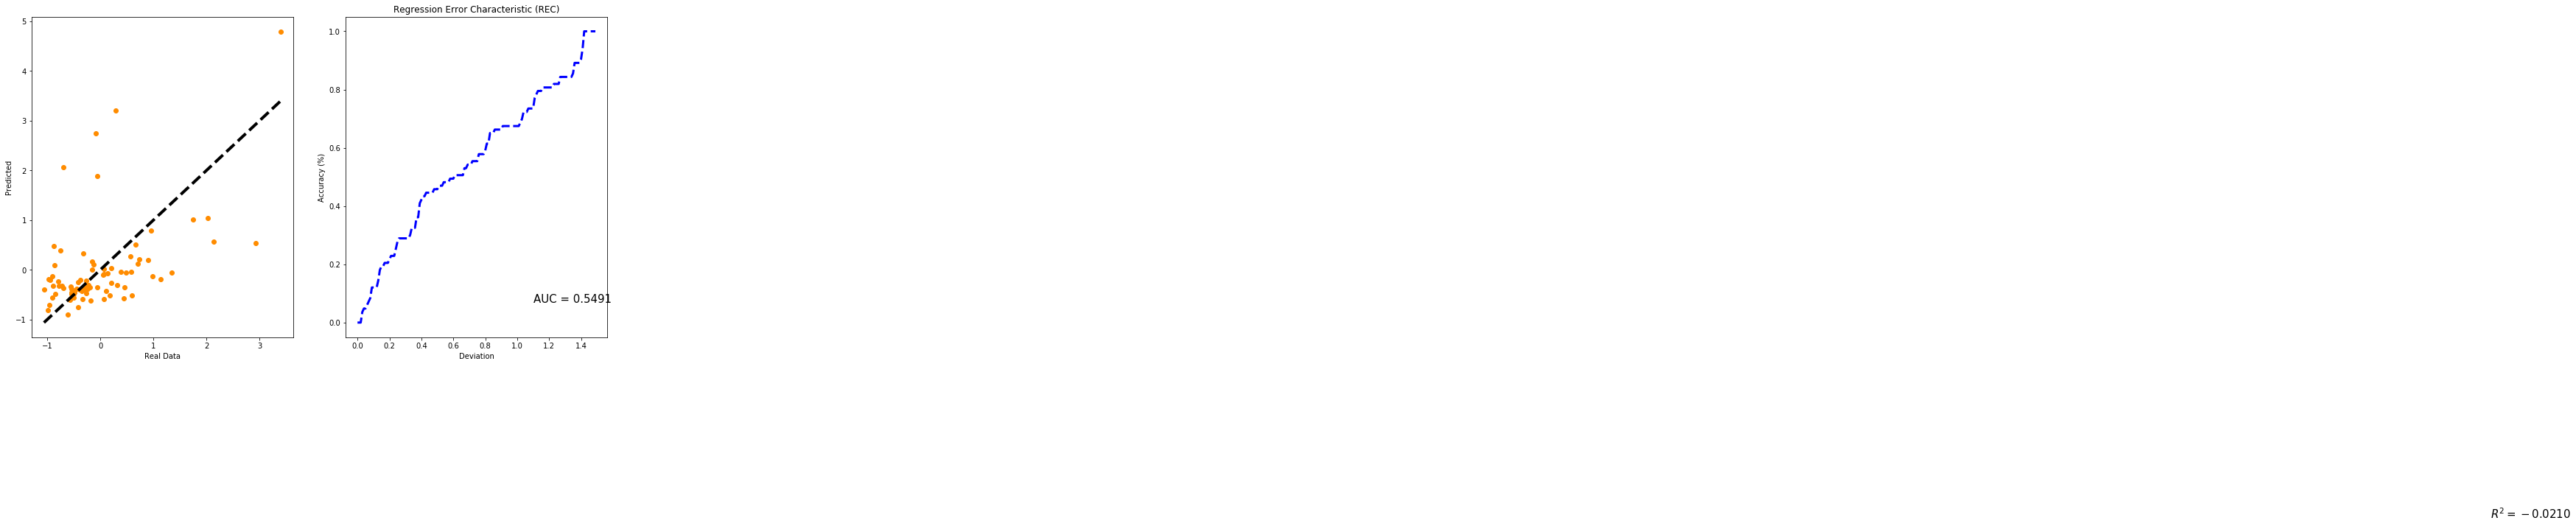

In [22]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {  'learning_rate':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
                 'n_estimators': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70] ,
              'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,95,100],
              'min_samples_split':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'min_samples_leaf':[0.1,0.20,0.3,0.4,0.5],
              'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
              'max_features': [1,2,3,4,5,6,7,8,9,10]
                 }  
regressor = GradientBoostingRegressor()
random=RandomizedSearchCV(estimator=regressor,param_distributions=param_grid,cv=3,n_jobs=-1)
random_result=random.fit(X_important_train,y_train)
print("Best: %f using %s" % (random_result.best_score_,random_result.best_params_))

Best: 0.051324 using {'n_estimators': 20, 'min_weight_fraction_leaf': 0.4, 'min_samples_split': 25, 'min_samples_leaf': 0.4, 'max_features': 5, 'max_depth': 1, 'learning_rate': 0.05}


/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


In [31]:

regressor = GradientBoostingRegressor(learning_rate=80,n_estimators=8,max_depth=35,min_samples_split = 50,min_samples_leaf=0.5,min_weight_fraction_leaf=0.2,max_features=1)

regressor.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=80, loss='ls', max_depth=35, max_features=1,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=0.5,
             min_samples_split=50, min_weight_fraction_leaf=0.2,
             n_estimators=8, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_predval = regressor.predict(X_important_val)

In [33]:

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6179922132404443
0.712948406730735
0.844362722253141
R2 Score
-2.3182180822534093e-05


R^2 = -0.0000


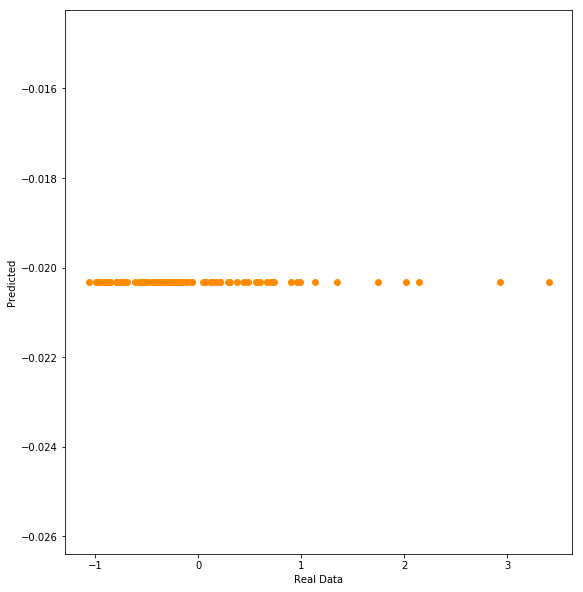

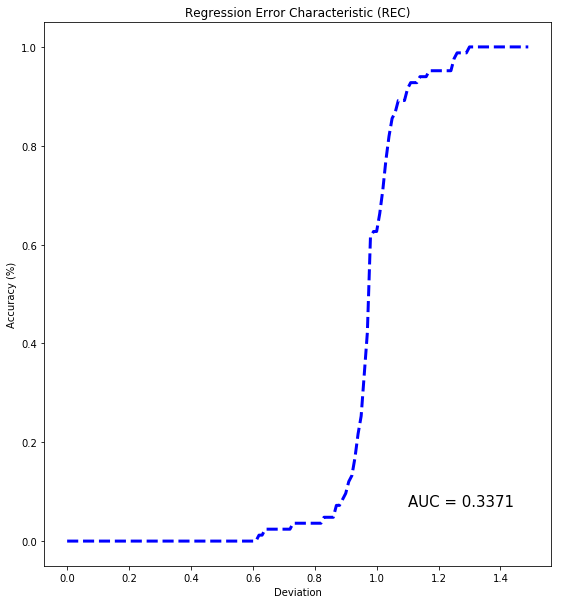

In [34]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()